<a href="https://colab.research.google.com/github/Topu2274/Maternal-Healthcare/blob/main/Maternal_Healthcare_(Updated).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/maternal.csv')
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


(1014, 7)

Encoding Risk level Coloumn

In [ ]:
data.rename(columns={'RiskLevel':'Output'},inplace=True)
data['Output'].replace(['high risk','low risk','mid risk'],[0,1,2],inplace=True)
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,Output
0,25,130,80,15.0,98.0,86,0
1,35,140,90,13.0,98.0,70,0
2,29,90,70,8.0,100.0,80,0
3,30,140,85,7.0,98.0,70,0
4,35,120,60,6.1,98.0,76,1


Checking null value

In [ ]:
data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
Output         0
dtype: int64

Printing total rows and coloumns

In [ ]:
print("Total Rows:",data.shape[0])
print("Total Coloumns:",data.shape[1])

Total Rows: 1014
Total Coloumns: 7


In [ ]:
data.Output.value_counts()

Output
1    406
2    336
0    272
Name: count, dtype: int64

Checking Duplicate Values

In [ ]:
print(f"There are {data.duplicated().sum()} duplicates data")
data.loc[data.duplicated(keep=False)].sort_values(by=data.columns.to_list())

There are 562 duplicates data


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,Output
670,10,100,50,6.0,99.0,70,2
849,10,100,50,6.0,99.0,70,2
552,12,90,60,7.5,102.0,60,1
940,12,90,60,7.5,102.0,60,1
543,12,90,60,7.5,102.0,66,1
...,...,...,...,...,...,...,...
553,60,120,85,15.0,98.0,60,2
772,60,120,85,15.0,98.0,60,2
818,60,120,85,15.0,98.0,60,2
114,63,140,90,15.0,98.0,90,0


Removing highly corelated features

In [ ]:
def removeHighlyCorFeatures(dataset, th):
  corr_matrix=dataset.corr().abs()
  upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
  to_drop=[column for column in upper.columns if any(upper[column]>th)]
  print(to_drop)
  dataset.drop(to_drop,axis=1,inplace=True)

Heatmap

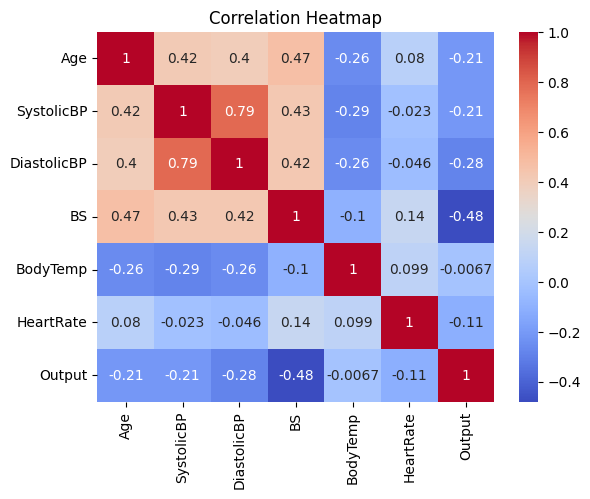

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Calling highly corelated features

In [ ]:
X=data.iloc[:,0:-1]
removeHighlyCorFeatures(X,0.8)
X.shape

[]


(1014, 6)

Printing duplicate datas

In [ ]:
print(data.duplicated)

<bound method DataFrame.duplicated of       Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  Output
0      25         130           80  15.0      98.0         86       0
1      35         140           90  13.0      98.0         70       0
2      29          90           70   8.0     100.0         80       0
3      30         140           85   7.0      98.0         70       0
4      35         120           60   6.1      98.0         76       1
...   ...         ...          ...   ...       ...        ...     ...
1009   22         120           60  15.0      98.0         80       0
1010   55         120           90  18.0      98.0         60       0
1011   35          85           60  19.0      98.0         86       0
1012   43         120           90  18.0      98.0         70       0
1013   32         120           65   6.0     101.0         76       2

[1014 rows x 7 columns]>


Eliminating duplicates datas

In [ ]:
data=data.drop_duplicates()

In [ ]:
data.Output.value_counts()

Output
1    234
0    112
2    106
Name: count, dtype: int64

Visualizing dataset

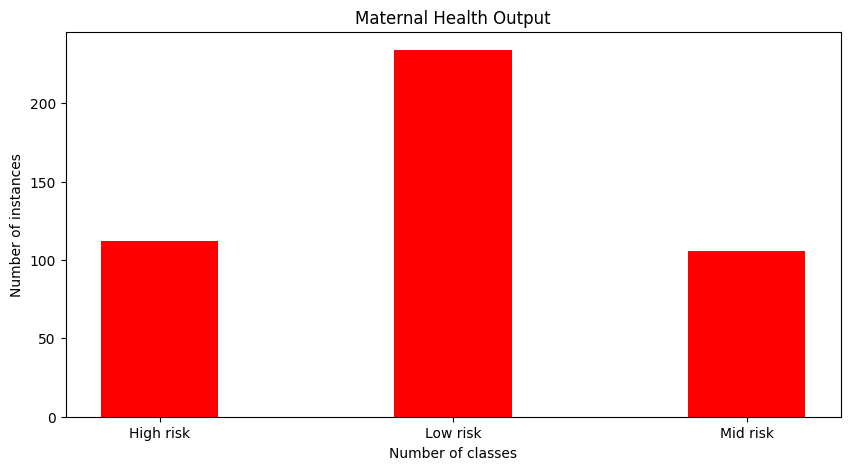

In [ ]:
import matplotlib.pyplot as plt

courses = ["High risk", "Low risk", "Mid risk"]
values = [sum(data["Output"]==0), sum(data["Output"]==1), sum(data["Output"]==2)]

fig = plt.figure(figsize=(10,5))
plt.bar(courses, values, color='red', width=0.4)
plt.xlabel("Number of classes")
plt.ylabel("Number of instances")
plt.title("Maternal Health Output")
plt.show()


In [ ]:
p_colors = 'green,orange,red'

<ipython-input-20-3351fc96a50e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count = sns.countplot(x="Output", data=data, ax=ax[1], order=risk_order, palette=p_colors.split(','))


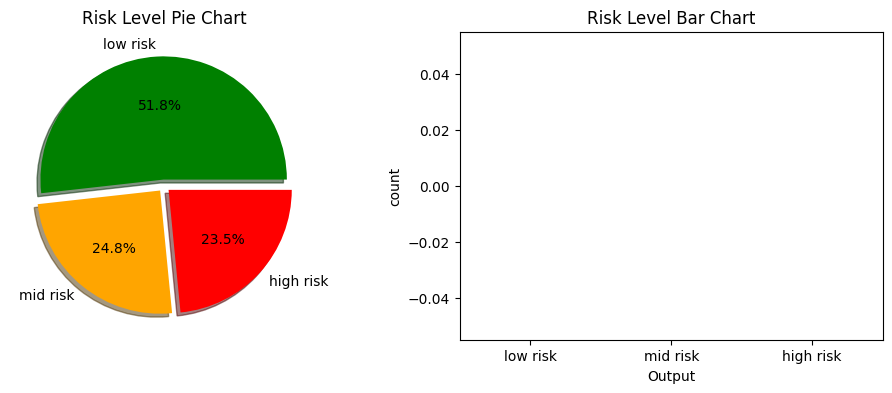

In [ ]:
p_colors = 'green,orange,red'
risk_order = ["low risk", "mid risk", "high risk"]
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

data["Output"].value_counts().plot(kind="pie", labels=risk_order, colors=p_colors.split(','), explode=[0.05, 0.05, 0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Risk Level Pie Chart")
ax[0].set_ylabel('')

count = sns.countplot(x="Output", data=data, ax=ax[1], order=risk_order, palette=p_colors.split(','))
for bar in count.patches:
    count.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')
ax[1].set_title("Risk Level Bar Chart")
plt.show()

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,452.0,29.194690,13.767379,10.0,19.0,25.0,35.0,70.0
SystolicBP,452.0,110.553097,17.872282,70.0,90.0,120.0,120.0,160.0
DiastolicBP,452.0,75.418142,13.754578,49.0,65.0,80.0,86.0,100.0
BS,452.0,8.346173,2.829209,6.0,6.9,7.5,7.9,19.0
BodyTemp,452.0,98.692478,1.410897,98.0,98.0,98.0,98.0,103.0
HeartRate,452.0,73.949115,8.156973,7.0,70.0,76.0,80.0,90.0
Output,452.0,0.986726,0.695121,0.0,1.0,1.0,1.0,2.0


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SystolicBP'}>,
        <Axes: title={'center': 'DiastolicBP'}>],
       [<Axes: title={'center': 'BS'}>,
        <Axes: title={'center': 'BodyTemp'}>,
        <Axes: title={'center': 'HeartRate'}>],
       [<Axes: title={'center': 'Output'}>, <Axes: >, <Axes: >]],
      dtype=object)

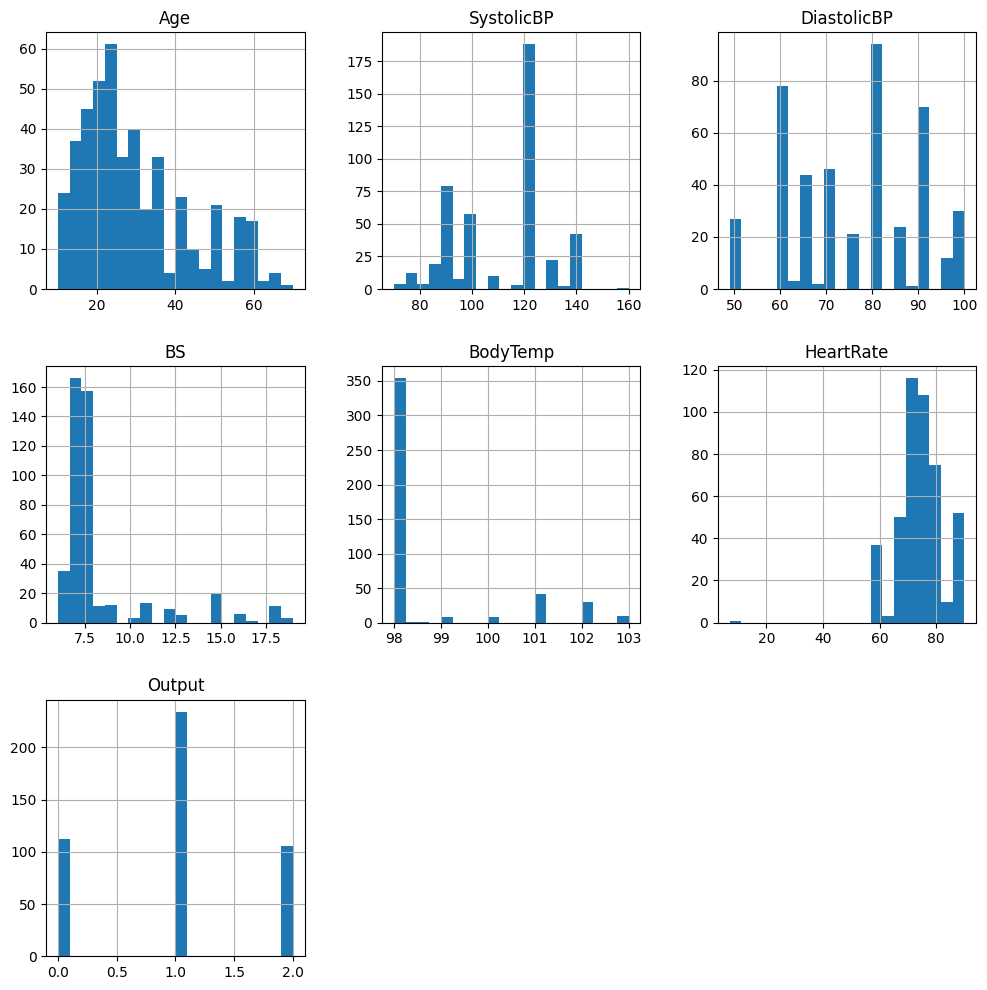

In [ ]:
data.hist(figsize=(12,12),bins=20)

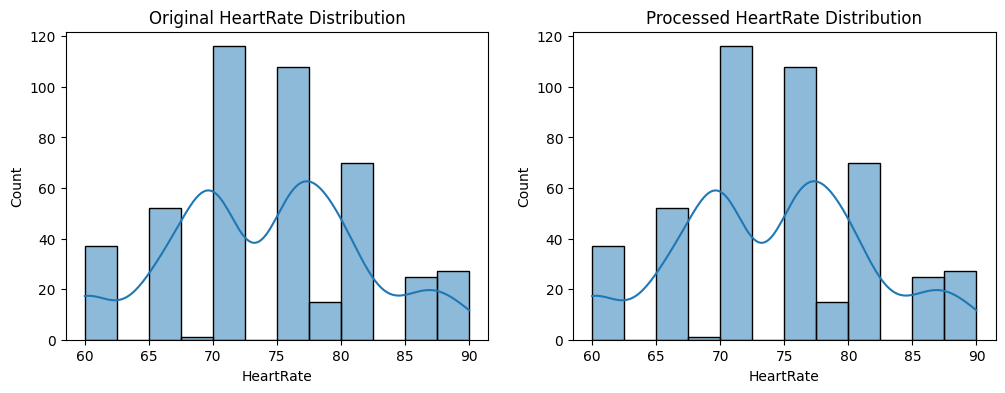

In [ ]:
 data = data.drop(data.index[data.HeartRate == 7])
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data=data, x="HeartRate", kde=True, ax=ax[0])
sns.histplot(data=data, x="HeartRate", kde=True, ax=ax[1])
ax[0].set_title("Original HeartRate Distribution")
ax[1].set_title("Processed HeartRate Distribution")
plt.show()

Test Train


In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop("Output", axis=1)
y = data.Output

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train, y_train)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)

print(new_xtrain)

[[0.18333333 0.55555556 0.60784314 0.06923077 0.         0.93333333]
 [0.11666667 0.16666667 0.21568627 0.11538462 0.6        0.86666667]
 [0.08333333 0.33333333 0.21568627 0.         0.         0.66666667]
 ...
 [0.21666667 0.33333333 0.70588235 0.09900797 0.         0.2       ]
 [0.26666667 0.55555556 0.60784314 0.06153846 0.         0.2       ]
 [0.33333333 0.51111111 0.21568627 0.0980457  0.41456264 0.73333333]]


In [ ]:
data.Output.value_counts()

Output
1    233
0    112
2    106
Name: count, dtype: int64

Visualizing

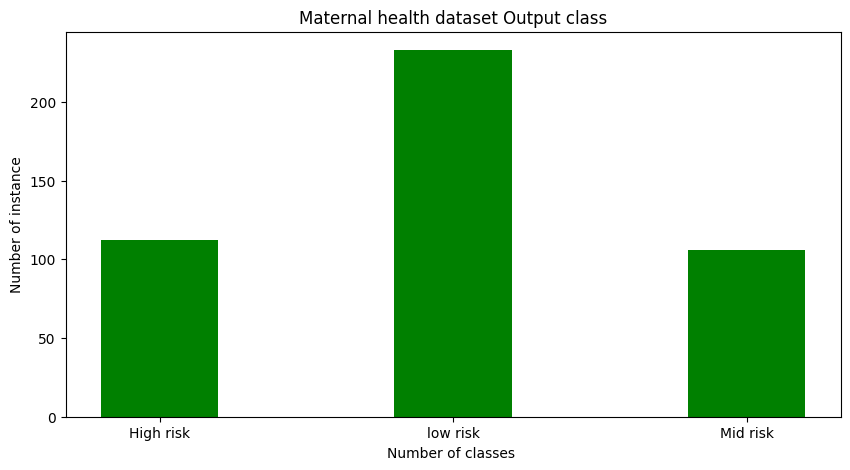

In [ ]:

courses = ["High risk", "low risk", "Mid risk"]
values = [sum(data["Output"] == 0), sum(data["Output"] == 1), sum(data["Output"] == 2)]
fig = plt.figure(figsize = (10, 5))

plt.bar(courses, values, color = 'green', width = 0.4)
plt.xlabel("Number of classes ")
plt.ylabel("Number of instance")
plt.title("Maternal health dataset Output class")
plt.show()

Accuracy Part

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(random_state=100)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.6813186813186813


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    "n_estimators": [10, 20, 50, 100],
    "criterion": ["gini", "entropy"]
}

rf = RandomForestClassifier(random_state=100)
grid = GridSearchCV(rf, params, cv=10)
grid.fit(x_train, y_train)
print("Best hyperparameter:", grid.best_params_)



Best hyperparameter: {'criterion': 'gini', 'n_estimators': 50}


In [ ]:
pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")[["params", "mean_test_score", "rank_test_score"]]

,params,mean_test_score,rank_test_score
2,"{'criterion': 'gini', 'n_estimators': 50}",0.636111,1
6,"{'criterion': 'entropy', 'n_estimators': 50}",0.633333,2
3,"{'criterion': 'gini', 'n_estimators': 100}",0.627778,3
7,"{'criterion': 'entropy', 'n_estimators': 100}",0.627778,3
1,"{'criterion': 'gini', 'n_estimators': 20}",0.625000,5
0,"{'criterion': 'gini', 'n_estimators': 10}",0.622222,6
4,"{'criterion': 'entropy', 'n_estimators': 10}",0.622222,7
5,"{'criterion': 'entropy', 'n_estimators': 20}",0.622222,7


Accuracy after processing

In [ ]:
y_pred = grid.predict(x_test)
print(f"Processed Dataset Accuracy: {accuracy_score(y_test, y_pred)}")

Processed Dataset Accuracy: 0.6813186813186813


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(random_state=100, multi_class='ovr')
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)
proba_pred = lr.predict_proba(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, proba_pred, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.2f}")


Accuracy: 0.6703296703296703
              precision    recall  f1-score   support

           0       0.81      0.57      0.67        23
           1       0.64      1.00      0.78        47
           2       1.00      0.05      0.09        21

    accuracy                           0.67        91
   macro avg       0.82      0.54      0.51        91
weighted avg       0.76      0.67      0.59        91

ROC AUC Score: 0.75


In [ ]:

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = XGBClassifier(random_state=100)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.6813186813186813


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model.predict_proba(x_test), multi_class='ovr')

0.8263328171750404

In [ ]:
model.save_model("xgBoost.json")

In [ ]:
x_train.shape

(360, 6)

In [ ]:
rf2 = RandomForestClassifier(random_state=100)
rf2.fit(x_train, y_train)
y_pred = rf2.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.6813186813186813


In [ ]:
import joblib
joblib.dump(rf2, "model.pkl")

['model.pkl']

In [ ]:
roc_auc_score(y_test, rf2.predict_proba(x_test), multi_class='ovr')

0.7955043527695665